In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from helper import *
import operator
import networkx as nx
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [4]:
df = pd.read_csv("../data/facebook_combined.txt",sep=' ',names=['NodeA','NodeB'])

In [5]:
df['NodeB'].unique()

array([   1,    2,    3, ..., 4036, 4037, 4038])

In [6]:
adj_mat = np.zeros((4039,4039))

In [7]:
for i in range(len(df)):
    item = df.values[i]
    adj_mat[item[0]][item[1]] = adj_mat[item[1]][item[0]] = 1

In [8]:
adj_mat

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
eigen_value , eigen_vector,eigen_vector_sorted = spectral_decomposition(adj_mat)

In [8]:
print(eigen_value,eigen_vector)

0.0008365064567887084 [-1.90788630e-02 -4.29456887e-03 -3.27107567e-03 ... -7.46270030e-05
 -1.05576260e-04 -1.57304421e-04]


In [9]:
fiedler_vector = eigen_vector

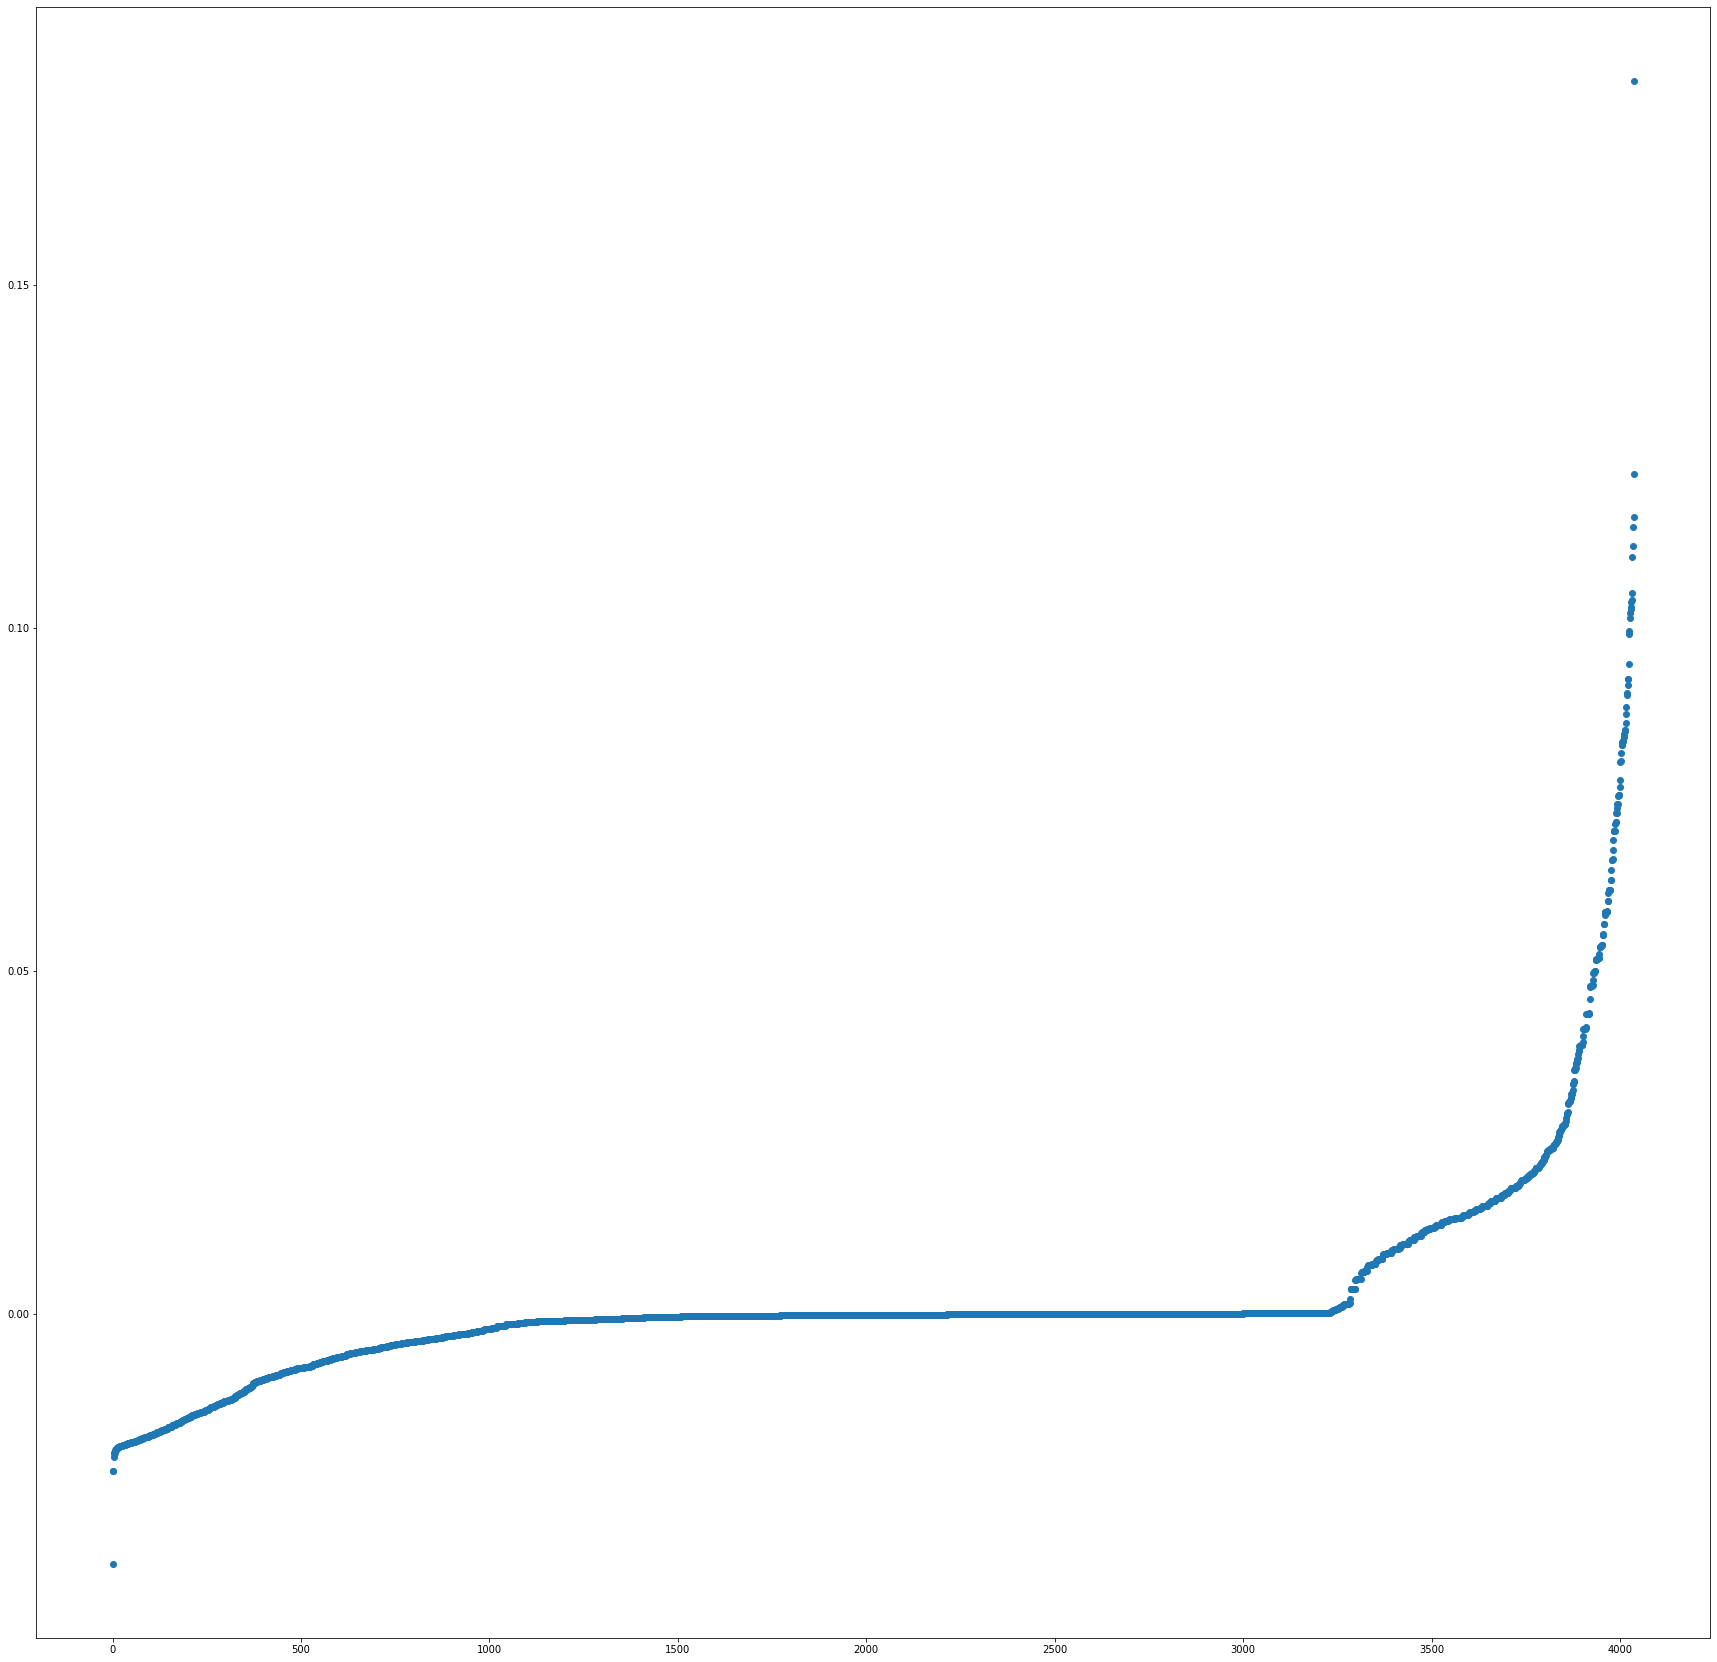

In [10]:
fig = plt.figure(figsize=(30,30))
plt.scatter(range(4039),eigen_vector_sorted)

In [11]:
count=0
node =0
positive_nodes = []
negative_nodes = []
for i in fiedler_vector:
    
    if i<0:
        negative_nodes.append(node)
        count+=1
        
    else:
        positive_nodes.append(node)
    node+=1
#     print(i)
print(count)

2509


In [9]:
G = nx.from_numpy_matrix(adj_mat)


In [10]:
def modularity_matrix(G):
    adj_mat = nx.adjacency_matrix(G).toarray()
    d_i = np.sum(adj_mat,axis=1)
    m  = 1/d_i.sum()       # m = 1/ 2*No.of edges
    d_i = np.reshape(d_i,(len(d_i),1))
    K= m* np.matmul(d_i,d_i.T)    #all (d_i *d_j)/2*(no of edges)
    return m * (adj_mat - K )    # k = di*dj/(2*no of edges)


def modularity_community(M,X):
    modularity_value = 0
    for i in X:
        for j in X:
            modularity_value +=M[i][j]
    return  modularity_value


def initialize_communities_and_partitions(G):
    adj_mat = nx.adjacency_matrix(G).toarray()
    M = modularity_matrix(G)
    nodes = list(range(len(adj_mat)))
    communities = {i:{i} for i in range(len(adj_mat))}
    commMap = [i for i in range(len(adj_mat))]
    return adj_mat, M, nodes,commMap, communities

def delQ(M, i,j):
    modularity_j  = modularity_community(M,j) 
    # modularity_j_before  = modularity_j + M[i][i]
    # modularity_j_after =  modularity_j + M[i][i] + sum([ M[i][item] + M[item][i] for item in j] ) 
    return sum([ M[i][item] + M[item][i] for item in j] )

def max_modularity_change(M,nodes, communities,commMap):
    c=[]
    n= len(M)
    mx = 0
    i_final =0
    for i in nodes:
        c = []
        mx = 0
        i_final =0
        for j in communities:
            difference_Q = delQ(M,i,communities[j])                
            if mx< difference_Q:
                mx = difference_Q
                c = j
#                 i_final = i
#         print(mx, c)
        if mx>0 and commMap[i]!=c:
            
            communities[commMap[i]].remove(i)
            communities[c].add(i)  ## add i to j community
            
            if len(communities[commMap[i]])==0:
                communities.pop(commMap[i])
            commMap[i] = c
#         print(communities[c])
                

    return communities, commMap

def louvian_method(G):

    adj_mat, M, nodes,commMap, communities = initialize_communities_and_partitions(G)
    mx = 1
    itr=0
    initial_comm = len(nodes)
    while(itr<10):
        communities,commMap  = max_modularity_change(M,nodes,communities,commMap)
        
        print(len(communities))
        if initial_comm == len(communities):
            break;
        initial_comm = len(communities)
        itr+=1
    return communities



    
    

In [11]:
communities = louvian_method(G)

/var/folders/_h/5bg4_75534q1s_dc1vvxdh1w0000gn/T/ipykernel_2790/3567813808.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).toarray()
/var/folders/_h/5bg4_75534q1s_dc1vvxdh1w0000gn/T/ipykernel_2790/3567813808.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).toarray()


605
155
118
105
102
102


{42: {33, 42}, 69: {0, 1, 3, 5, 7, 9, 10, 11, 12, 13, 15, 16, 18, 21, 22, 23, 25, 26, 27, 29, 30, 31, 37, 38, 39, 40, 43, 45, 47, 48, 50, 51, 54, 55, 56, 59, 60, 61, 62, 63, 65, 66, 67, 69, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 84, 85, 87, 88, 96, 98, 103, 104, 105, 106, 109, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 141, 142, 146, 148, 153, 155, 156, 157, 158, 160, 161, 164, 165, 166, 168, 169, 170, 172, 176, 178, 183, 185, 186, 188, 190, 191, 199, 200, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 215, 221, 222, 223, 224, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 240, 246, 247, 248, 250, 252, 257, 258, 260, 261, 265, 267, 268, 269, 270, 271, 272, 274, 276, 277, 280, 283, 285, 286, 287, 288, 290, 291, 292, 294, 295, 297, 298, 301, 303, 304, 308, 311, 313, 314, 315, 316, 317, 318, 322, 323, 324, 325, 329, 331, 332, 334, 335, 336, 338, 339, 340, 341, 342, 344, 345, 347}, 95: {319, 6, 327, 147, 89, 154, 219, 95}, 135: {320, 15

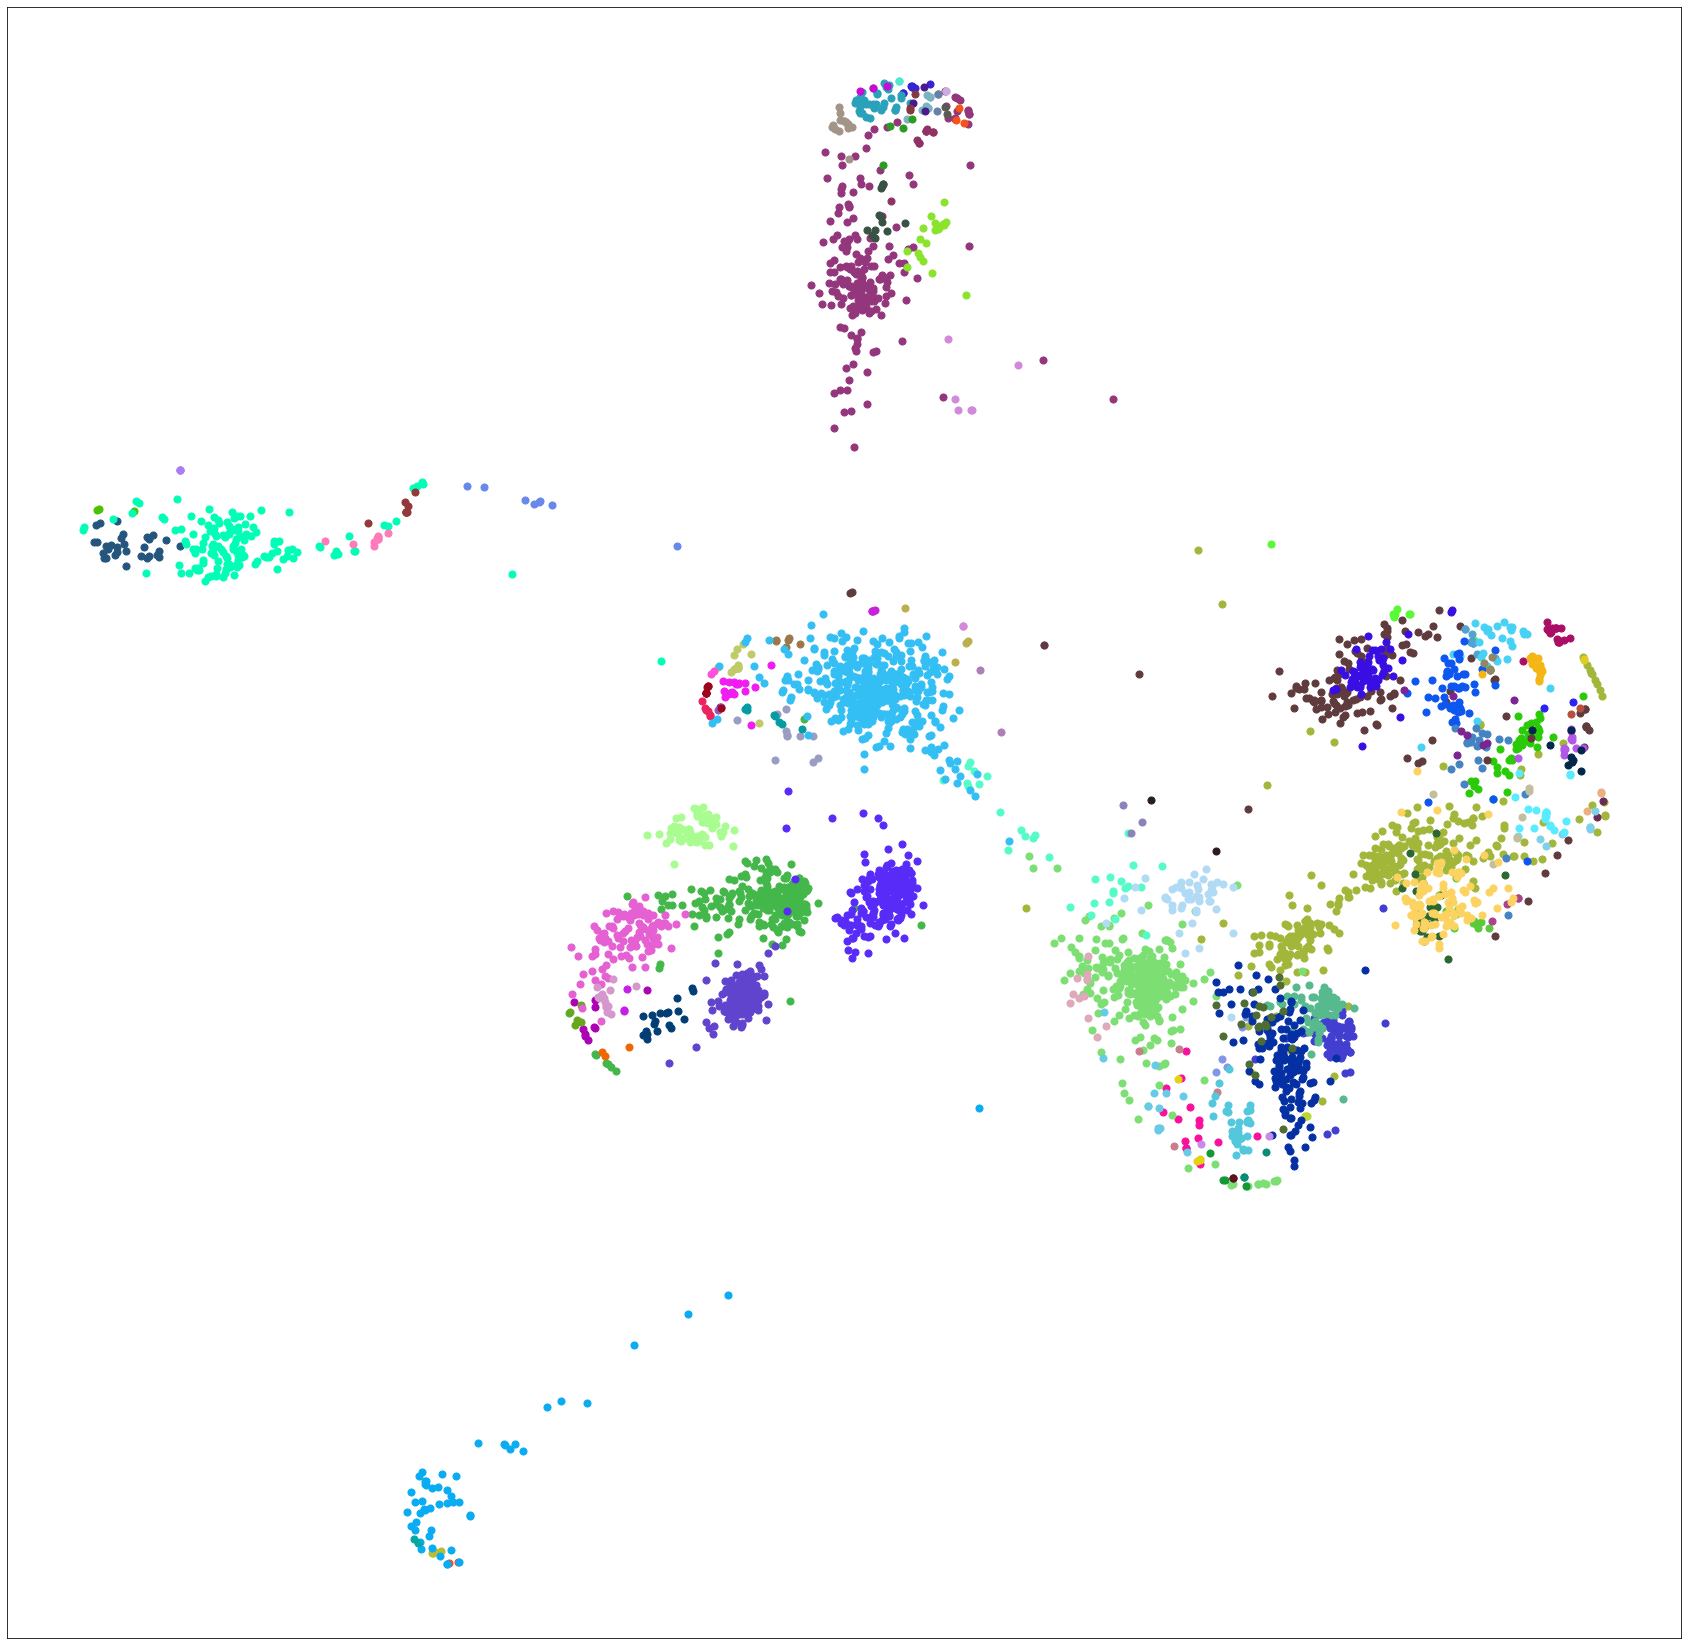

In [14]:
# communities
print(communities)
c_list=[]
for c in communities:
    c_list.append(list(communities[c]))
plot(1,c_list,G)

In [ ]:
def getAdjMatCom(communities,mat):
    n = len(communities)
    adj_mat = np.zeros((n,n))
    i=0
    for X in communities:
        j=0
        for Y in communities:
            adj_mat[i][j] = getTotalEdgesBetweenCommunities(X,Y,mat)
            j+=1
        i+=1  
    return getAdjMatCom
                
    
        

In [ ]:
fig = plt.figure(figsize=(50,50))

pos =nx.spring_layout(G)
nx.draw_networkx(G,pos)


In [ ]:
fig = plt.figure(figsize=(50,50))

pos =nx.spring_layout(G)
nx.draw_networkx_edges(G,pos,)
nx.draw_networkx_nodes(G,pos,positive_nodes,node_color='r', node_size=50,)
nx.draw_networkx_nodes(G,pos,negative_nodes, node_color='g',node_size=50,)
print(pos)

In [ ]:
def removeEdges(cluster1, cluster2,G):
    for node in cluster1:
        for adjNode in list(G.adj[node]):
            if adjNode in cluster2:
                G.remove_edge(node,adjNode)
    return G

In [ ]:
# G1 = removeEdges(positive_nodes,negative_nodes,G)

In [ ]:
# fig = plt.figure(figsize=(50,50))

# pos =nx.spring_layout(G1)
# nx.draw_networkx_edges(G1,pos,)
# nx.draw_networkx_nodes(G1,pos,positive_nodes,node_color='r', node_size=50,)
# nx.draw_networkx_nodes(G1,pos,negative_nodes, node_color='g',node_size=50,)

In [ ]:
print(len(G.edges()) ,len(G.nodes()))

In [ ]:
def get_clusters(k,G):
    initial_cluster = list(range(4039))
    list_clusters = [initial_cluster]
    i=0
    while i<k:
        list_clusters = sorted(list_clusters, key=len)
        
        largest_cluster = list_clusters.pop()
        
        adj_mat = nx.adjacency_matrix(G,nodelist=largest_cluster).toarray()
#         print(adj_mat.shape)
        eigen_value, fiedler_vector, fiedler_vector_sorted = spectral_decomposition(adj_mat)
        fig = plt.figure(figsize=(30,30))
        plt.scatter(range(len(fiedler_vector)),fiedler_vector_sorted)
        positive_nodes = []
        negative_nodes = []
        node=0
        count=0
        for i in fiedler_vector:
            if i<0:
                negative_nodes.append(largest_cluster[node])
                count+=1
            else:
                positive_nodes.append(largest_cluster[node])
            node += 1
        print("Length is ",len(positive_nodes),len(negative_nodes))   
        list_clusters.append(positive_nodes)
#         print(list_clusters)
        list_clusters.append(negative_nodes)
        G = removeEdges(positive_nodes,negative_nodes,G)
        i = len(list_clusters)
        print(i)
    return G, list_clusters
    
    

In [ ]:
n_clusters = 9
G,list_clusters = get_clusters(n_clusters,G)

In [ ]:
for item in list_clusters:
    print(len(item))

In [ ]:
colors = ["#0005FF","#FF0000", "#00FF00", "#FFFF00", "#00FFFF", "#FF00FF", "#FFA500", "#006400", "#2F4F4F", "#DDA0DD"]


In [ ]:
len(colors)

In [13]:
def plot(k, list_clusters, G1):
    def color_list(n):
        colors= []
        for  i in range(n):
            color = "#" + "%06x" % random.randint(0, 0xFFFFFF)
            colors.append(color)
        return colors
    colors = color_list(len(list_clusters))
    fig = plt.figure(figsize=(30,30))
    pos =nx.spring_layout(G1)
#     nx.draw_networkx_edges(G1,pos)
    for i in range(len(list_clusters)):
        nx.draw_networkx_nodes(G1,pos,nodelist=list_clusters[i],node_color=colors[i], node_size=50,)


In [ ]:
plot(n_clusters,list_clusters,G)

In [ ]:

df1 = pd.read_csv("../data/soc-sign-bitcoinotc.csv",names=['NodeA','NodeB','rating','time'])
df1.head()
df1['NodeA'].nunique()

In [ ]:
adj_mat1 = np.zeros((6005,6005))
for i in range(len(df1)):
    item = df1.values[i]
#     print(item)
    adj_mat1[int(item[0])-1][int(item[1])-1] = adj_mat1[int(item[1])-1][int(item[0])-1] =  abs(item[2])

In [ ]:
i=0
c=0
n = 6005
zero_rows = []
for item in adj_mat1:
    if not np.any(item):    #to delete row which have all zero values
        zero_rows.append(i)
        c+=1
    i+=1
print(c)
adj_mat1 = np.delete(adj_mat1,zero_rows,0)
print(adj_mat1.shape)
adj_mat1 = np.delete(adj_mat1,zero_rows,1)

In [ ]:
print(adj_mat1)
# fig = plt.figure(figsize=(30,30))

G1 = nx.from_numpy_matrix(adj_mat1)
print(adj_mat1.shape)
# nx.draw(G1)

In [ ]:
n_clusters = 4
G1,list_clusters = get_clusters(n_clusters,G1)

In [ ]:

plot(n_clusters,list_clusters,G1)

In [ ]:
fig = plt.figure(figsize=(30,30))
mat = adj_mat
plt.imshow(mat, cmap='hot', interpolation='nearest')

    

In [ ]:
def modularity_matrix(G):
    adj_mat = nx.adjacency_matrix(G).toarray()
    d_i = np.sum(adj_mat,axis=1)
    m  = 1/d_i.sum()       # m = 1/ 2*No.of edges
    d_i = np.reshape(d_i,(len(d_i),1))
    K= m* np.matmul(d_i,d_i.T)    #all (d_i *d_j)/2*(no of edges)
    return m * (adj_mat - K )    # k = di*dj/(2*no of edges)


def modularity_community(M,X):
    modularity_value = 0
    for i in X:
        for j in X:
            modularity_value +=M[i][j]
    return  modularity_value


def initialize_communities_and_partitions(G):
    adj_mat = nx.adjacency_matrix(G).toarray()
    M = modularity_matrix(G)
    nodes = list(range(len(adj_mat)))
#     communities = {i:{i} for i in range(len(adj_mat))}
    communities = [[i] for i in range(len(adj_mat))]
    
    commMap = {i: i for in range(len(adj_mat))}
    return adj_mat, M, nodes,commMap, communities

def delQ(M, i,j):
#     modularity_j  = modularity_community(M,j) 
    # modularity_j_before  = modularity_j + M[i][i]
    # modularity_j_after =  modularity_j + M[i][i] + sum([ M[i][item] + M[item][i] for item in j] ) 
    return sum([ M[i][item] + M[item][i] for item in j] )

def max_modularity_change(M,nodes, communities,commMap):
    c=[]
    n= len(M)
    mx = 0
#     i_final =0
    for i in nodes:
#         c = []
        mx = 0
        i_final =0
        for j in range(0,len(communities)):
            if j==[]: cont
            difference_Q = delQ(M,i,communities[j])                
            if mx< difference_Q:
                mx = difference_Q
                c = communities.index(j)
#                 i_final = i
#         print(mx, c)
        if mx>0 and commMap[i]!=c:
            
            communities[commMap[i]].remove(i)
            communities[c].add(i)  ## add i to j community
            
            if len(communities[commMap[i]])==0:
                communities.pop(commMap[i])
            commMap[i] = c
#         print(communities[c])
                

    return communities, commMap

def louvian_method(G):

    adj_mat, M, nodes,commMap, communities = initialize_communities_and_partitions(G)
    itr=0
    initial_comm = len(nodes)
    while(itr<10):
        communities,commMap  = max_modularity_change(M,nodes,communities,commMap)
        
        print(len(communities))
        if initial_comm == len(communities):
            break;
        initial_comm = len(communities)
        itr+=1
    return communities, adj_mat  

def getTotalEdgesBetweenCommunities(X,Y, adj_mat):
    sum =0
    for i in X:
        for  j in Y:
            sum +=adj_mat[i][j]
    return sum

def getAdjMatCom(communities,mat):
    n = len(communities)
    adj_mat = np.zeros((n,n))
    i=0
    for X in communities:
        j=0
        for Y in communities:
            adj_mat[i][j] = getTotalEdgesBetweenCommunities(X,Y,mat)
            j+=1
        i+=1  
    return adj_mat
                


def louvian_algorithm(G):
    #phase 1:
    
    communities, com_adj_mat  = louvian_method(G)
    k = list(communities.keys())
    d_of_dicts = []
    d = { i: k[i] for i in range(len(k))}
    d_of_dicts.append(d)
    communities = list(communities.values())
    while(len(communities)<=2):
        adj_mat = getAdjMatCom(communities,com_adj_mat)
        G = nx.from_numpy_matrix(adj_mat)
        
        communites, com_adj_mat = louvian_method(G)
        k = list(communities.keys())
        d_of_dicts = []
        d = { i: k[i] for i in range(len(k))}
        d_of_dicts.append(d)
        
        

        
        
    
            

In [19]:
k = list(communities.keys())

In [20]:
d = { i: k[i] for i in range(len(k))}
print(d)

{0: 42, 1: 69, 2: 95, 3: 135, 4: 151, 5: 179, 6: 189, 7: 195, 8: 201, 9: 205, 10: 241, 11: 253, 12: 256, 13: 278, 14: 282, 15: 293, 16: 300, 17: 307, 18: 351, 19: 382, 20: 401, 21: 468, 22: 505, 23: 572, 24: 612, 25: 642, 26: 650, 27: 767, 28: 775, 29: 831, 30: 852, 31: 865, 32: 877, 33: 882, 34: 895, 35: 1016, 36: 1044, 37: 1069, 38: 1111, 39: 1178, 40: 1208, 41: 1224, 42: 1240, 43: 1245, 44: 1253, 45: 1486, 46: 1586, 47: 1627, 48: 1657, 49: 1698, 50: 1731, 51: 1748, 52: 1760, 53: 1775, 54: 1829, 55: 1892, 56: 1905, 57: 2167, 58: 2168, 59: 2401, 60: 2424, 61: 2435, 62: 2536, 63: 2548, 64: 2565, 65: 2595, 66: 2721, 67: 2792, 68: 2801, 69: 2917, 70: 3003, 71: 3012, 72: 3037, 73: 3122, 74: 3147, 75: 3194, 76: 3290, 77: 3310, 78: 3311, 79: 3372, 80: 3407, 81: 3543, 82: 3581, 83: 3585, 84: 3598, 85: 3641, 86: 3657, 87: 3668, 88: 3675, 89: 3676, 90: 3699, 91: 3700, 92: 3742, 93: 3787, 94: 3792, 95: 3846, 96: 3885, 97: 3925, 98: 4007, 99: 4012, 100: 4018, 101: 4029}


In [24]:
communities1 = list(communities.values())
communities1

[{33, 42},
 {0,
  1,
  3,
  5,
  7,
  9,
  10,
  11,
  12,
  13,
  15,
  16,
  18,
  21,
  22,
  23,
  25,
  26,
  27,
  29,
  30,
  31,
  37,
  38,
  39,
  40,
  43,
  45,
  47,
  48,
  50,
  51,
  54,
  55,
  56,
  59,
  60,
  61,
  62,
  63,
  65,
  66,
  67,
  69,
  72,
  73,
  74,
  75,
  76,
  77,
  79,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  96,
  98,
  103,
  104,
  105,
  106,
  109,
  113,
  114,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  128,
  129,
  130,
  132,
  133,
  134,
  141,
  142,
  146,
  148,
  153,
  155,
  156,
  157,
  158,
  160,
  161,
  164,
  165,
  166,
  168,
  169,
  170,
  172,
  176,
  178,
  183,
  185,
  186,
  188,
  190,
  191,
  199,
  200,
  202,
  203,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213,
  215,
  221,
  222,
  223,
  224,
  228,
  229,
  231,
  232,
  234,
  235,
  236,
  237,
  238,
  239,
  240,
  246,
  247,
  248,
  250,
  252,
  257,
  258,
  260,
  261,
  265,
  267,
  268,
  269,
  270

In [28]:
def getTotalEdgesBetweenCommunities(X,Y, adj_mat):
    sum =0
    for i in X:
        for  j in Y:
            sum +=adj_mat[i][j]
    return sum

def getAdjMatCom(communities,mat):
    n = len(communities)
    adj_mat = np.zeros((n,n))
    i=0
    for X in communities:
        j=0
        for Y in communities:
            adj_mat[i][j] = getTotalEdgesBetweenCommunities(X,Y,mat)
            j+=1
        i+=1  
    return adj_mat
new_adj = getAdjMatCom(communities1,adj_mat)

In [30]:
G1 = nx.from_numpy_matrix(new_adj)
communities2 = louvian_method(G1)

101
101


/var/folders/_h/5bg4_75534q1s_dc1vvxdh1w0000gn/T/ipykernel_2790/3567813808.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).toarray()
/var/folders/_h/5bg4_75534q1s_dc1vvxdh1w0000gn/T/ipykernel_2790/3567813808.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).toarray()


/var/folders/_h/5bg4_75534q1s_dc1vvxdh1w0000gn/T/ipykernel_2790/3567813808.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).toarray()
/var/folders/_h/5bg4_75534q1s_dc1vvxdh1w0000gn/T/ipykernel_2790/3567813808.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).toarray()


101
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
It

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iteration Done --------- 
101
Iterat

KeyboardInterrupt: 